In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

#change path
root_dir = "/content/drive/My Drive/"
base_dir = root_dir + 'COVID-19'
os.chdir(base_dir)

#mount google driver
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
#root_dir = "/content/gdrive/My Drive/"

!pwd

/content/drive/My Drive/COVID-19


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
covid = pd.read_csv('/content/drive/MyDrive/COVID-19/covid_data.csv')
del covid['Unnamed: 0']
del covid['no_weekend']
del covid['yes_weekend']
covid.set_index('Name', inplace = True)
covid.head()

,per_health_budget,Age,population_density,aged_ratio,smoking_rate,drink_ratio,per_medical_facilities,per_medical_staff,deceased
Name,,,,,,,,,
서울종로구,56731,45.2,6347,18.9,17.9,57.9,0.006708,0.032071,11
서울중구,67355,45.5,12692,19.1,17.5,54.4,0.003292,0.017157,3
서울용산구,40204,44.3,10476,17.2,11.3,55.0,0.001210,0.004856,6
서울성동구,39650,42.9,17846,15.3,19.2,60.5,0.001665,0.005378,10
서울광진구,37583,42.4,20595,14.4,21.0,59.9,0.002027,0.005839,12


# 선형회귀분석 사전작업
- 극단값이 있을 경우 회귀분석의 결과가 왜곡될 수 있다. 상자 그림을 그려서 극단값이 있는지 확인해본다.

### per_health_budget, Age 극단값 확인 후 정제

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

Text(0.5, 1.0, 'Age')

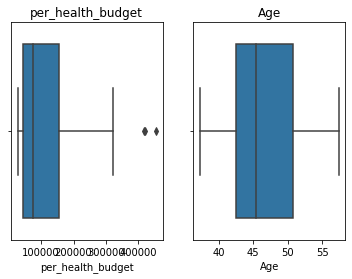

In [ ]:
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# per_health_budget의 상자 그림을 첫 번째(ax1)로 그린다. 방향은 수직(orient='v')
sns.boxplot('per_health_budget', data=covid, ax=ax1, orient='v')
ax1.set_title('per_health_budget')

# Age의 상자 그림을 두 번째(ax2)로 그린다.
sns.boxplot('Age', data=covid, ax=ax2, orient='v')
ax2.set_title('Age')

In [ ]:
Index_label = covid.query('per_health_budget > 400000').index.tolist() 
print(Index_label)

covid=covid.drop(['전북진안군', '경북청송군', '경북울릉군'])

['전북진안군', '경북청송군', '경북울릉군']


In [ ]:
Index_label = covid.query('per_health_budget > 300000').index.tolist() 
print(Index_label)
covid=covid.drop(['전북무주군', '인천옹진군', '강원정선군', '경북영양군']) 

['인천옹진군', '강원정선군', '전북무주군', '경북영양군']


### pop_density, aged_ratio 극단값 확인 후 정제

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

Text(0.5, 1.0, 'aged_ratio')

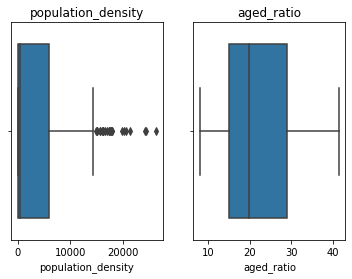

In [ ]:
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# pop_density 상자 그림을 첫 번째(ax1)로 그린다. 방향은 수직(orient='v')
sns.boxplot('population_density', data=covid, ax=ax1, orient='v')
ax1.set_title('population_density')

# aged_ratio의 상자 그림을 두 번째(ax2)로 그린다.
sns.boxplot('aged_ratio', data=covid, ax=ax2, orient='v')
ax2.set_title('aged_ratio')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 0, 'smoking_rate')

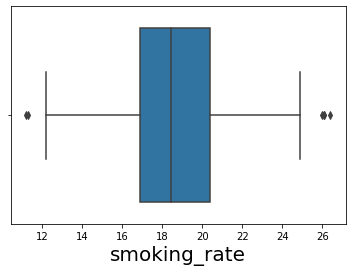

In [ ]:
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1) = plt.subplots(1, 1)  

# pop_density 상자 그림을 첫 번째(ax1)로 그린다. 방향은 수직(orient='v')
sns.boxplot('smoking_rate', data=covid, ax=ax1, orient='v')
plt.xlabel('smoking_rate', fontsize=20)

In [ ]:
# 인구밀도는 데이터 값 차이가 너무 커 log값 취해줌.

covid['population_density']=np.log(covid['population_density'])

#Inf, -Inf를 NaN으로 처리 후 제거하기
covid=covid.replace([-np.inf,np.inf], np.nan)
covid=covid.dropna(axis=0)
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 서울종로구 to 경남합천군
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   per_health_budget       226 non-null    int64  
 1   Age                     226 non-null    float64
 2   population_density      226 non-null    float64
 3   aged_ratio              226 non-null    float64
 4   smoking_rate            226 non-null    float64
 5   drink_ratio             226 non-null    float64
 6   per_medical_facilities  226 non-null    float64
 7   per_medical_staff       226 non-null    float64
 8   deceased                226 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 17.7+ KB


### smoke_ratio, drink_ratio 극단값 확인 후 정제

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

Text(0.5, 1.0, 'drink_ratio')

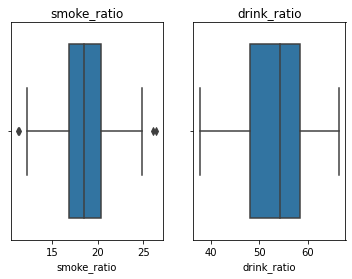

In [ ]:
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# smoke_ratio의 상자 그림을 첫 번째(ax1)로 그린다. 방향은 수직(orient='v')
sns.boxplot('smoke_ratio', data=covid, ax=ax1, orient='v')
ax1.set_title('smoke_ratio')

# drink_ratio의 상자 그림을 두 번째(ax2)로 그린다.
sns.boxplot('drink_ratio', data=covid, ax=ax2, orient='v')
ax2.set_title('drink_ratio')

In [ ]:
covid['smoke_ratio'].min()

11.2

In [ ]:
Index_label = covid.query('smoke_ratio < 11.4').index.tolist() 
print(Index_label)

Index_label2 = covid.query('smoke_ratio > 25').index.tolist() 
print(Index_label2)

covid=covid.drop(['경기과천시', '인천미추홀구', '경기동두천시', '서울용산구'])

['서울용산구', '경기과천시']
['인천미추홀구', '경기동두천시']


### per_medical_facilities, per_medical_staff 극단값 확인 후 정제

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

Text(0.5, 1.0, 'per_medical_staff')

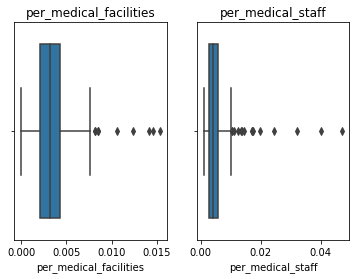

In [ ]:
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# per_medical_facilities의 상자 그림을 첫 번째(ax1)로 그린다. 방향은 수직(orient='v')
sns.boxplot('per_medical_facilities', data=covid, ax=ax1, orient='v')
ax1.set_title('per_medical_facilities')

# per_medical_staff의 상자 그림을 두 번째(ax2)로 그린다.
sns.boxplot('per_medical_staff', data=covid, ax=ax2, orient='v')
ax2.set_title('per_medical_staff')

In [ ]:
# per_medical_facilities, per_medical_staff는 데이터 값 차이가 너무 커 log 값 취해줌.

covid['per_medical_facilities']=np.log(covid['per_medical_facilities'])
covid['per_medical_staff']=np.log(covid['per_medical_staff'])


#Inf, -Inf를 NaN으로 처리 후 제거하기
covid=covid.replace([-np.inf,np.inf], np.nan)
covid=covid.dropna(axis=0)
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 서울종로구 to 경남합천군
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   per_health_budget       213 non-null    int64  
 1   Age                     213 non-null    float64
 2   pop_density             213 non-null    float64
 3   aged_ratio              213 non-null    float64
 4   smoke_ratio             213 non-null    float64
 5   drink_ratio             213 non-null    float64
 6   per_medical_facilities  213 non-null    float64
 7   per_medical_staff       213 non-null    float64
 8   deceased                213 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 16.6+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
covid['per_medical_staff'].max()

-3.0537923478852615

In [ ]:
# log 취한 후 이상치 제거

Index_label = covid.query('per_medical_facilities < - 7.2').index.tolist() 
print(Index_label)

Index_label2 = covid.query('per_medical_staff > - 4.07').index.tolist() 
print(Index_label2)

covid=covid.drop(['서울마포구', '강원화천군', '전북장수군', '전남완도군','경북군위군', '경남산청군'])

covid=covid.drop(['서울종로구', '서울중구', '서울강남구', '부산서구', '대구중구', '대구남구', '광주동구', '전남화순군'])


['서울마포구', '강원화천군', '전북장수군', '전남완도군', '경북군위군', '경남산청군']
['서울종로구', '서울중구', '서울강남구', '부산서구', '대구중구', '대구남구', '광주동구', '전남화순군']


### deceased 극단값 확인 후 정제

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'deceased')

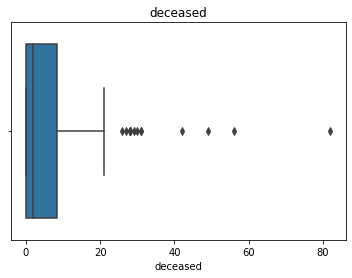

In [ ]:
fig, (ax1) = plt.subplots(1, 1)  

# deceased 상자 그림을 첫 번째(ax1)로 그린다. 방향은 수직(orient='v')
sns.boxplot('deceased', data=covid, ax=ax1, orient='v')
ax1.set_title('deceased')

In [ ]:
# deceased는 데이터 값 차이가 너무 커 log 값 취해줌.

covid['deceased']=np.log(covid['deceased'])

#Inf, -Inf를 NaN으로 처리 후 제거하기
covid=covid.replace([-np.inf,np.inf], np.nan)
covid=covid.dropna(axis=0)
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 서울성동구 to 경남거제시
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   per_health_budget       127 non-null    int64  
 1   Age                     127 non-null    float64
 2   pop_density             127 non-null    float64
 3   aged_ratio              127 non-null    float64
 4   smoke_ratio             127 non-null    float64
 5   drink_ratio             127 non-null    float64
 6   per_medical_facilities  127 non-null    float64
 7   per_medical_staff       127 non-null    float64
 8   deceased                127 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 9.9+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


- 정규분포 확인

In [ ]:
import scipy.stats

print(scipy.stats.skew(covid['per_health_budget']))
print(scipy.stats.skew(covid['Age']))
print(scipy.stats.skew(covid['pop_density']))
print(scipy.stats.skew(covid['aged_ratio'])) # 
print(scipy.stats.skew(covid['smoke_ratio'])) # 
print(scipy.stats.skew(covid['drink_ratio'])) # 
print(scipy.stats.skew(covid['per_medical_facilities']))
print(scipy.stats.skew(covid['per_medical_staff']))
print(scipy.stats.skew(covid['deceased']))

1.7910225104223803
0.9681764602363109
-0.21782178516747813
1.1021951416877735
0.2989366162711412
-0.6055800655934271
-0.28141459072547786
-0.2247712844056108
0.05508288679274248


# 원본 데이터 핸들링

In [ ]:
data = covid[['per_health_budget', 'no_weekend','yes_weekend', 'Age', 'pop_density','aged_ratio', 'smoke_ratio', 'drink_ratio', 'per_medical_facilities', 'per_medical_staff']]
label = covid['deceased']

In [ ]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler, RobustScaler
inputs = ['per_health_budget', 'no_weekend','yes_weekend', 'Age', 'pop_density','aged_ratio', 'smoke_ratio', 'drink_ratio', 'per_medical_facilities', 'per_medical_staff' ]

X = data[inputs]

scaler = RobustScaler()
X = scaler.fit_transform(X)
df_covid = pd.DataFrame(X, index=data.index, columns=data.columns)
df_covid.head()

,per_health_budget,no_weekend,yes_weekend,Age,pop_density,aged_ratio,smoke_ratio,drink_ratio,per_medical_facilities,per_medical_staff
Name,,,,,,,,,,
서울종로구,-0.167520,1.0,0.0,-0.012308,1.003730,-0.056338,-0.157143,0.377724,1.628189,9.304391
서울중구,-0.072682,0.0,2.0,0.024615,2.091926,-0.042254,-0.271429,0.038741,0.094973,4.371814
서울용산구,-0.315052,0.0,0.0,-0.123077,1.711872,-0.176056,-2.042857,0.096852,-0.839675,0.303154
서울성동구,-0.319998,1.0,0.0,-0.295385,2.975861,-0.309859,0.214286,0.629540,-0.635272,0.476070
서울광진구,-0.338449,0.0,0.0,-0.356923,3.447327,-0.373239,0.728571,0.571429,-0.472820,0.628329


In [ ]:
covid = pd.concat([df_covid,label],axis=1)
covid

,per_health_budget,no_weekend,yes_weekend,Age,pop_density,aged_ratio,smoke_ratio,drink_ratio,per_medical_facilities,per_medical_staff,deceased
Name,,,,,,,,,,,
서울종로구,-0.167520,1.0,0.0,-0.012308,1.003730,-0.056338,-0.157143,0.377724,1.628189,9.304391,11
서울중구,-0.072682,0.0,2.0,0.024615,2.091926,-0.042254,-0.271429,0.038741,0.094973,4.371814,3
서울용산구,-0.315052,0.0,0.0,-0.123077,1.711872,-0.176056,-2.042857,0.096852,-0.839675,0.303154,6
서울성동구,-0.319998,1.0,0.0,-0.295385,2.975861,-0.309859,0.214286,0.629540,-0.635272,0.476070,10
서울광진구,-0.338449,0.0,0.0,-0.356923,3.447327,-0.373239,0.728571,0.571429,-0.472820,0.628329,12
...,...,...,...,...,...,...,...,...,...,...,...
경남하동군,1.225162,0.0,1.0,1.058462,-0.072975,1.028169,-0.585714,-1.191283,0.164582,-0.341590,0
경남산청군,1.118942,0.0,0.0,1.206154,-0.077091,1.190141,-0.585714,-1.181598,-1.330828,-0.625777,1
경남함양군,1.384567,0.0,1.0,0.935385,-0.075376,0.978873,-0.014286,-0.987893,-0.991416,-0.531331,0


## 각 feature 정규 분포로 변환
- 왜도가 높은 변수 log취해줌.

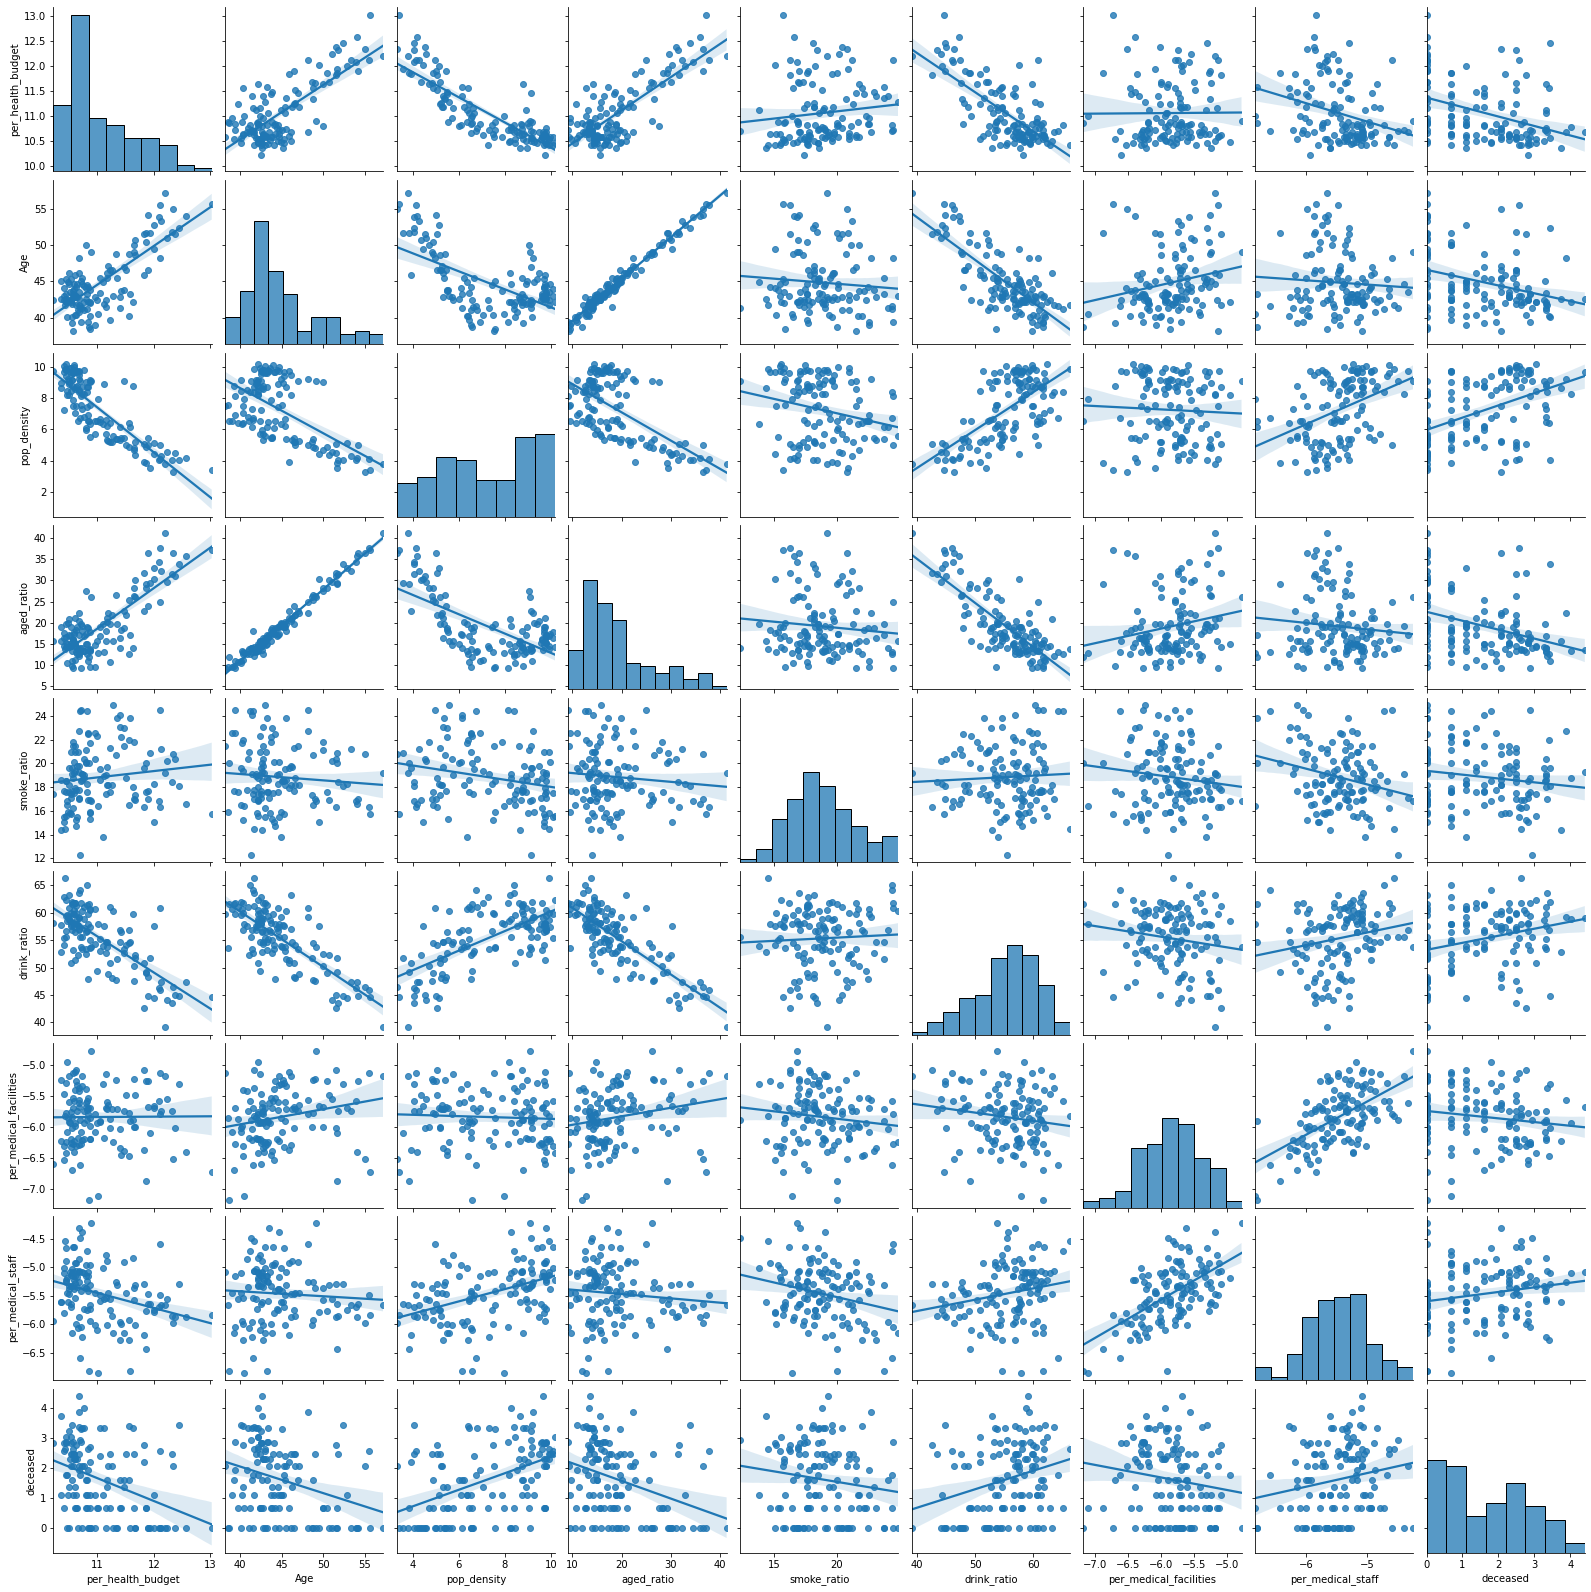

In [ ]:
sns.pairplot(data=covid, kind='reg') #회귀선 그리기
plt.show()

## 원본 데이터 상관분석

In [ ]:
covid.corr(method = 'pearson')

,per_health_budget,Age,pop_density,aged_ratio,smoke_ratio,drink_ratio,per_medical_facilities,per_medical_staff,deceased
per_health_budget,1.000000,0.762715,-0.851287,0.797629,0.124333,-0.719338,0.007725,-0.311414,-0.379636
Age,0.762715,1.000000,-0.598706,0.988144,-0.086618,-0.769151,0.225437,-0.071178,-0.308885
pop_density,-0.851287,-0.598706,1.000000,-0.643859,-0.235295,0.658447,-0.048509,0.427609,0.465157
aged_ratio,0.797629,0.988144,-0.643859,1.000000,-0.102905,-0.796292,0.217435,-0.106521,-0.352859
smoke_ratio,0.124333,-0.086618,-0.235295,-0.102905,1.000000,0.055202,-0.135659,-0.259456,-0.150388
drink_ratio,-0.719338,-0.769151,0.658447,-0.796292,0.055202,1.000000,-0.160421,0.213368,0.281508
per_medical_facilities,0.007725,0.225437,-0.048509,0.217435,-0.135659,-0.160421,1.000000,0.595195,-0.157830
per_medical_staff,-0.311414,-0.071178,0.427609,-0.106521,-0.259456,0.213368,0.595195,1.000000,0.191432
deceased,-0.379636,-0.308885,0.465157,-0.352859,-0.150388,0.281508,-0.157830,0.191432,1.000000


# 선형회귀분석 실시

In [ ]:
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1차 회귀분석 실행
- R-squared(모형 적합도): 0.265
- Adj. R-squared:	0.208
- F-statistic: 	4.651 (회귀모형에 대한 (통계적) 유의미성 검증 결과)
- Intercept: 	-1.6416(deceased가 0일 때 per_health_budget ~ per_medical_staff 값) 

In [ ]:
model = ols(formula = 'deceased ~ per_health_budget + Age + pop_density + aged_ratio + smoke_ratio + drink_ratio + per_medical_facilities + per_medical_staff', data = covid)

In [ ]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               deceased   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     7.071
Date:                Wed, 05 May 2021   Prob (F-statistic):           1.32e-07
Time:                        09:04:49   Log-Likelihood:                -177.92
No. Observations:                 127   AIC:                             373.8
Df Residuals:                     118   BIC:                             399.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -11.9730      5.484     -2.183      0.031     -22.832      -1.114
per_health_budget       5.946e-06    3.8e-06      1.564      0.121   -1.58e-06    1.35e-05
Age                        0.4660      0.158      2.957      0.004       0.154       0.778
pop_density                0.1974      0.090      2.189      0.031       0.019       0.376
aged_ratio                -0.3460      0.103     -3.369      0.001      -0.549      -0.143
smoke_ratio               -0.0716      0.041     -1.763      0.080      -0.152       0.009
drink_ratio               -0.0494      0.029     -1.695      0.093      -0.107       0.008
per_medical_facilities    -0.6099      0.303     -2.014      0.046      -1.210      -0.010
per_medical_staff          0.3684      0.283      1.304      0.195      -0.191       0.928
==============================================================================
Omnibus:                        2.024   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                1.999
Skew:                           0.299   Prob(JB):                        0.368
Kurtosis:                       2.856   Cond. No.                     5.64e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 다중공선성 진단
다중공선성(multicollinearity): 하나의 독립변수가 다른 여러 개의 독립변수들로 잘 예측되는 경우

- 다중공선성이 있으면 계수 추정이 잘 되지 않거나 불안정해져서 데이터가 약간만 바뀌어도 추정치가 크게 달라질 수 있음.
- 계수가 통계적으로 유의미하지 않은 것처럼 나올 수 있음.

- 분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단
- 엄밀한 기준은 없으나 보통 10보다 크면 다중공선성이 있다고 판단(5를 기준으로 하기도 함)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,per_health_budget,6.792189
1,Age,52.159869
2,pop_density,5.256171
3,aged_ratio,64.265378
4,smoke_ratio,1.333425
5,drink_ratio,3.127795
6,per_medical_facilities,2.161445
7,per_medical_staff,2.499414


## 다중공선성 대처
- 계수가 통계적으로 유의미하지 않다면 대처
- 계수가 통계적으로 유의미하다면 VIF가 크더라도 특별히 대처할 필요없음.
- 변수들을 더하거나 빼서 새로운 변수를 만든다
  - (개념적으로나 이론적으로) 두 예측변수를 더하거나 빼더라도 문제가 없는 경우
  - 예) 남편의 수입과 아내의 수입이 서로 상관이 높다면, 두 개를 더해 가족 수입이라는 하나의 변수로 투입한다
- 더하거나 빼기 어려운 경우는 변수를 모형에서 제거한다
  - 단, 변수를 제거하는 것은 자료의 다양성을 해치고, 분석하려던 가설이나 이론에 영향을 미칠 수 있기 때문에 가급적 자제

In [ ]:
# Age 제거 후 다중공선성 체크

res1 = ols(formula = 'deceased ~ per_health_budget + pop_density + aged_ratio + smoke_ratio + drink_ratio + per_medical_facilities + per_medical_staff', data = covid)

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(res1.exog, i)} 
             for i, column in enumerate(res1.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,per_health_budget,6.725599
1,pop_density,5.136867
2,aged_ratio,4.593754
3,smoke_ratio,1.234846
4,drink_ratio,3.115235
5,per_medical_facilities,2.154331
6,per_medical_staff,2.463890


## 2차 회귀분석 실시
- Intercept가 음수로 나옴.(사망자는 마이너스가 될 수 없음)
  - 따라서 절편을 제거(0으로 고정)
  - 모형에서 절편을 제거한 경우 R제곱을 해석할 때 주의가 필요하다. 절편이 있는 경우와 없는 경우 계산 방식이 다르기 때문이다. 절편이 있는 경우에 R제곱은 종속변수의 분산에서 설명하는 비율을 나타내지만, 절편이 없는 경우는 종속변수의 제곱의 평균에서 설명하는 비율을 나타낸다.

- R-squared(모형 적합도): 0.739
- Adj. R-squared:	0.721
- F-statistic: 	41.16 (회귀모형에 대한 (통계적) 유의미성 검증 결과)

In [ ]:
model = ols(formula = 'deceased ~ 0 + per_health_budget +Age + pop_density + aged_ratio + smoke_ratio + drink_ratio + per_medical_facilities + per_medical_staff', data = covid)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               deceased   R-squared (uncentered):                   0.757
Model:                            OLS   Adj. R-squared (uncentered):              0.741
Method:                 Least Squares   F-statistic:                              46.31
Date:                Wed, 05 May 2021   Prob (F-statistic):                    4.89e-33
Time:                        09:20:16   Log-Likelihood:                         -180.43
No. Observations:                 127   AIC:                                      376.9
Df Residuals:                     119   BIC:                                      399.6
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
per_health_budget       4.983e-06   3.84e-06      1.299      0.196   -2.61e-06    1.26e-05
Age                        0.1608      0.074      2.175      0.032       0.014       0.307
pop_density                0.2072      0.092      2.264      0.025       0.026       0.388
aged_ratio                -0.1731      0.066     -2.606      0.010      -0.305      -0.042
smoke_ratio               -0.0598      0.041     -1.464      0.146      -0.141       0.021
drink_ratio               -0.0653      0.029     -2.283      0.024      -0.122      -0.009
per_medical_facilities    -0.5886      0.307     -1.915      0.058      -1.197       0.020
per_medical_staff          0.5174      0.278      1.858      0.066      -0.034       1.069
==============================================================================
Omnibus:                        1.212   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                1.262
Skew:                           0.226   Prob(JB):                        0.532
Kurtosis:                       2.815   Cond. No.                     3.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3차 회귀분석 실시
- p-value가 현저히 높음.(관련없는 변수 제거)
  - 제거한 변수: no_weekend, yes_weekend, per_health_budget, smoke_ratio, drink_ratio
- R-squared(모형 적합도): 0.739
- Adj. R-squared:	0.721
- F-statistic: 	41.16 (회귀모형에 대한 (통계적) 유의미성 검증 결과)

In [ ]:
model = ols(formula = 'deceased ~ 0 +Age + pop_density + aged_ratio  + drink_ratio + per_medical_facilities + per_medical_staff', data = covid)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               deceased   R-squared (uncentered):                   0.749
Model:                            OLS   Adj. R-squared (uncentered):              0.737
Method:                 Least Squares   F-statistic:                              60.34
Date:                Wed, 05 May 2021   Prob (F-statistic):                    4.64e-34
Time:                        09:26:39   Log-Likelihood:                         -182.33
No. Observations:                 127   AIC:                                      376.7
Df Residuals:                     121   BIC:                                      393.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Age                        0.1174      0.069      1.692      0.093      -0.020       0.255
pop_density                0.1875      0.073      2.553      0.012       0.042       0.333
aged_ratio                -0.1157      0.060     -1.944      0.054      -0.234       0.002
drink_ratio               -0.0658      0.029     -2.287      0.024      -0.123      -0.009
per_medical_facilities    -0.7130      0.292     -2.444      0.016      -1.291      -0.135
per_medical_staff          0.6019      0.276      2.182      0.031       0.056       1.148
==============================================================================
Omnibus:                        2.484   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                2.524
Skew:                           0.320   Prob(JB):                        0.283
Kurtosis:                       2.738   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ================================================================================================================================================================

In [ ]:
result = sm.ols(formula = 'deceased ~ health_budget_sum + nurse + GP + CS ', data = covid).fit()
result.summary()

In [ ]:
# sns.pairplot(data=covid, kind='reg') #회귀선 그리기
# plt.show()

In [ ]:
print(covid.health_budget_sum.max())
print(covid.NPIR.max())
print(covid.CS.max())

In [ ]:
Index_label = covid.query('NPIR > 50').index.tolist() 
print(Index_label) 

In [ ]:
covid=covid.drop(['경남창원시'])

In [ ]:
Index_label = covid.query('health_budget_sum > 100000000000').index.tolist() 
print(Index_label) 

In [ ]:
covid=covid.drop(['경기성남시'])

In [ ]:
Index_label = covid.query('CS > 3000').index.tolist() 
print(Index_label) 

In [ ]:
covid=covid.drop(['서울강남구'])

In [ ]:
Index_label = covid.query('deceased > 80').index.tolist() 
print(Index_label) 

In [ ]:
covid=covid.drop(['경기부천시'])

In [ ]:
covid.corr(method = 'pearson')

In [ ]:
covid

In [ ]:
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
inputs = ['health_budget_sum', 'no_weekend','yes_weekend', 'Age', 'pop_density','aged_ratio', 'smoke_ratio', 'drink_ratio', 'per_medical_facilities', 'per_medical_staff' ]

X = covid[inputs]


scaler = MinMaxScaler()
X = scaler.fit_transform(X)
df2_s = pd.DataFrame(X, index=covid.index, columns=covid.columns)
df2_s.head()

In [ ]:
df2_s.corr(method='pearson')

In [ ]:
result = sm.ols(formula = 'deceased ~ health_budget_sum + no_weekend + yes_weekend + Age + pop_density + aged_ratio + smoke_ratio + drink_ratio + ward + ICU + NPIR + GP + CS + nurse', data = df2_s).fit()
result.summary()

In [ ]:
result = sm.ols(formula = 'deceased ~ health_budget_sum + nurse + GP + CS ', data = df2_s).fit()
result.summary()

In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 30.0)
df2_s.plot.hist(subplots=True, legend=True)

In [ ]:
import numpy as np

df2_s['pop_density']=np.log(df2_s['pop_density'])
df2_s['ward']=np.log(df2_s['ward'])
df2_s['ICU']=np.log(df2_s['ICU'])
df2_s['NPIR']=np.log(df2_s['NPIR'])
df2_s['CS']=np.log(df2_s['CS'])
df2_s['nurse']=np.log(df2_s['nurse'])
df2_s['deceased']=np.log(df2_s['deceased'])

df2_s.info()

In [ ]:
#Inf, -Inf를 NaN으로 처리 후 제거하기
import numpy as np
df2_s=df2_s.replace([-np.inf,np.inf], np.nan)
df2_s=df2_s.dropna(axis=0)
df2_s.info()

In [ ]:
df2_s.plot.hist(subplots=True, legend=True)

In [ ]:
result = sm.ols(formula = 'deceased ~ health_budget_sum + no_weekend + yes_weekend + Age + pop_density + aged_ratio + smoke_ratio + drink_ratio + ward + ICU + NPIR + GP + CS + nurse', data = df2_s).fit()
result.summary()

In [ ]:
result = sm.ols(formula = 'deceased ~ health_budget_sum + ward  + CS', data = df2_s).fit()
result.summary()

In [ ]:
df2_s.corr(method = 'pearson')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df2_s.values, i) for i in range(df2_s.shape[1])]
vif["features"] = df2_s.columns
vif

In [ ]:
df2_s = df2_s.drop(['nurse', 'Age', 'aged_ratio'], axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df2_s.values, i) for i in range(df2_s.shape[1])]
vif["features"] = df2_s.columns
vif

In [ ]:
df2_s = df2_s.drop(['drink_ratio', 'ward'], axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df2_s.values, i) for i in range(df2_s.shape[1])]
vif["features"] = df2_s.columns
vif

In [ ]:
df2_s = df2_s.drop(['NPIR'], axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df2_s.values, i) for i in range(df2_s.shape[1])]
vif["features"] = df2_s.columns
vif

In [ ]:
df2_s = df2_s.drop(['CS'], axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df2_s.values, i) for i in range(df2_s.shape[1])]
vif["features"] = df2_s.columns
vif